In [6]:
import numpy as np
import matplotlib.pyplot as plt
from flowtracks.io import iter_trajectories_ptvis
%matplotlib inline

In [7]:
# see openptv forum for Christophe Henry messages
inName = "../res/ptv_is.%d" 
# or use the test data
# inName = "./test_data/ptv_is.%d" # the directory with the input files

In [21]:
#----parameters
traj_min_len = 5 # in this particular example we have short trajectories

#----cal traj.
trajects = list(iter_trajectories_ptvis(inName, first=10000, last=10100, traj_min_len=traj_min_len,frate=20))

In [22]:
print(f"{len(trajects)} trajectories")

19 trajectories


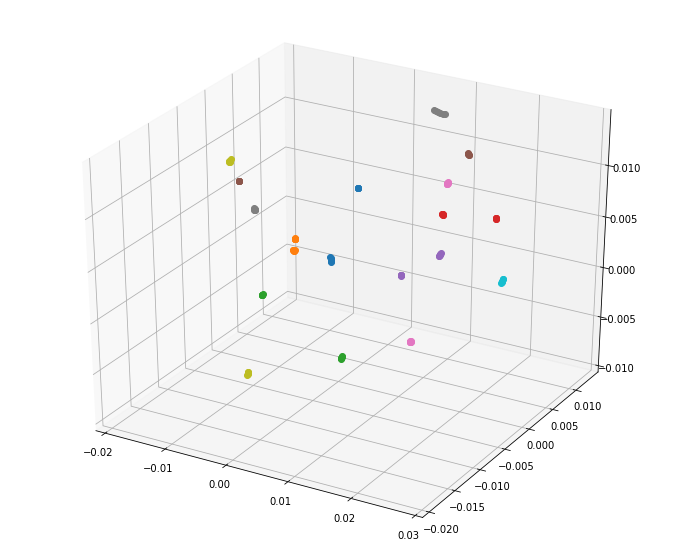

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
for tr in trajects: # generate one trajectory per loop call
    plt.plot(tr.pos()[:,0],tr.pos()[:,1],tr.pos()[:,2], '-o')

In [24]:
# velocity histograms

u,v,w = [],[],[]
ax,ay,az = [],[],[]

for tr in trajects:
    u.append(tr.velocity()[:,0])
    v.append(tr.velocity()[:,1])
    w.append(tr.velocity()[:,2])
    
    ax.append(tr.accel()[:,0])
    ay.append(tr.accel()[:,1])
    az.append(tr.accel()[:,2])

(-0.001, 0.001)

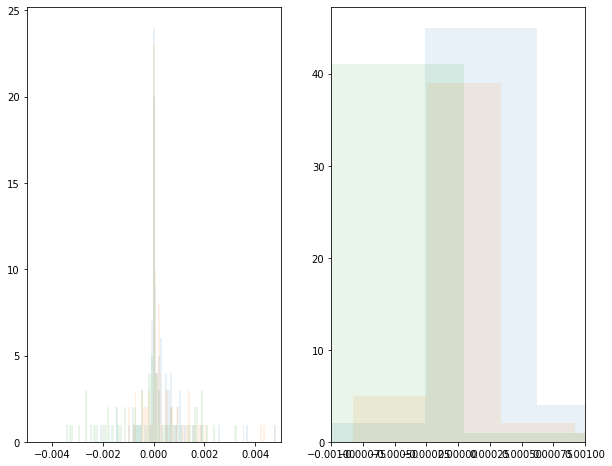

In [25]:
fig,a = plt.subplots(1,2,figsize=(10,8))

a[0].hist(np.hstack(u),100,alpha=0.1);
a[0].hist(np.hstack(v),100,alpha=0.1);
a[0].hist(np.hstack(w),100,alpha=0.1);

a[1].hist(np.hstack(ax),100,alpha=0.1);
a[1].hist(np.hstack(ay),100,alpha=0.1);
a[1].hist(np.hstack(az),100,alpha=0.1);
a[0].set_xlim(-0.005,0.005)
a[1].set_xlim(-0.001,0.001)

In [27]:
tr.pos()

array([[-0.006404, -0.009844, -0.006805],
       [-0.006453, -0.009816, -0.006894],
       [-0.00645 , -0.009857, -0.006965],
       [-0.006479, -0.009849, -0.007037],
       [-0.006561, -0.00987 , -0.007152]])

In [28]:
tr.velocity()

array([[-9.80e-04,  5.60e-04, -1.78e-03],
       [ 6.00e-05, -8.20e-04, -1.42e-03],
       [-5.80e-04,  1.60e-04, -1.44e-03],
       [-1.64e-03, -4.20e-04, -2.30e-03],
       [ 0.00e+00,  0.00e+00,  0.00e+00]])